In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

IMPORT ET STRUCTURE DES DONNEES

In [4]:
#import données
df=pd.read_csv("C:/Users/marvi/Desktop/4_Python_ML/Projet/df_logement.csv", sep = ';')

#prévisualtion des données
df.head()


,conso_5_usages_ef,conso_5_usages_ef_energie_n1,code_departement_ban,adresse_brut,code_region_ban,cout_total_5_usages,hauteur_sous_plafond,nom_commune_ban,coordonnee_cartographique_x_ban,qualite_isolation_murs,...,etiquette_dpe,_score,code_postal_source,annee_recherche,date_extraction,nom_rue_ban,nombre_appartement,logement,latitude,longitude
0,9791.0,9791.0,69.0,1PLACE DE L'EGLISE,84.0,1635.0,2.3,Aigueperse,810462.33,bonne,...,F,44.682632,69790,2021,2025-10-26 09:27:34,place de l'église,NaN,ancien,46.277281,4.434599
1,8579.9,8579.9,69.0,1PLACE DE L'EGLISE,84.0,1445.0,2.3,Aigueperse,810462.33,bonne,...,E,44.682632,69790,2021,2025-10-26 09:27:34,place de l'église,NaN,ancien,46.277281,4.434599
2,9791.0,9791.0,69.0,1PLACE DE L'EGLISE,84.0,1635.0,2.3,Aigueperse,810462.33,bonne,...,F,44.682632,69790,2021,2025-10-26 09:27:34,place de l'église,NaN,ancien,46.277281,4.434599
3,8579.9,8579.9,69.0,1PLACE DE L'EGLISE,84.0,1445.0,2.3,Aigueperse,810462.33,bonne,...,E,44.682632,69790,2021,2025-10-26 09:27:34,place de l'église,NaN,ancien,46.277281,4.434599
4,14970.6,14075.2,69.0,Allée des colombieres,84.0,2273.2,2.5,Propières,810871.04,bonne,...,E,44.682632,69790,2021,2025-10-26 09:27:34,NaN,1.0,ancien,46.188833,4.437585


In [5]:
#type de données
df.info()

#structure des données
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152272 entries, 0 to 1152271
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   conso_5_usages_ef                  1152272 non-null  float64
 1   conso_5_usages_ef_energie_n1       1152272 non-null  float64
 2   code_departement_ban               1151232 non-null  float64
 3   adresse_brut                       1152252 non-null  object 
 4   code_region_ban                    1151232 non-null  float64
 5   cout_total_5_usages                1152272 non-null  float64
 6   hauteur_sous_plafond               1152272 non-null  float64
 7   nom_commune_ban                    1152272 non-null  object 
 8   coordonnee_cartographique_x_ban    1152272 non-null  float64
 9   qualite_isolation_murs             1152272 non-null  object 
 10  type_batiment                      1152272 non-null  object 
 11  type_energie_principale_

,conso_5_usages_ef,conso_5_usages_ef_energie_n1,code_departement_ban,code_region_ban,cout_total_5_usages,hauteur_sous_plafond,coordonnee_cartographique_x_ban,cout_total_5_usages_energie_n1,coordonnee_cartographique_y_ban,code_postal_ban,surface_habitable_logement,_score,code_postal_source,annee_recherche,nombre_appartement,latitude,longitude
count,1.152272e+06,1.152272e+06,1.151232e+06,1151232.0,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.152272e+06,1.078872e+06,1.152272e+06,1.152272e+06
mean,1.444394e+04,1.349100e+04,6.899989e+01,84.0,1.560292e+03,2.611376e+00,8.403813e+05,1.323050e+03,6.508388e+06,6.923259e+04,9.210540e+01,2.924275e+01,6.923259e+04,2.022500e+03,2.494323e+01,4.567300e+01,4.814876e+00
std,5.723751e+05,5.707193e+05,5.778428e-02,0.0,3.566775e+04,4.290216e+00,3.678770e+04,3.531631e+04,2.790568e+05,2.415637e+02,3.238755e+02,4.308433e+00,2.415637e+02,1.118034e+00,4.570435e+01,2.215253e+00,2.815172e-01
min,1.320000e+02,1.000000e+00,3.800000e+01,84.0,3.830000e+01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.900100e+04,1.000000e+00,2.280085e+01,6.900100e+04,2.021000e+03,1.000000e+00,-5.983856e+00,-1.363081e+00
25%,4.341700e+03,4.050500e+03,6.900000e+01,84.0,5.989000e+02,2.500000e+00,8.393815e+05,4.923000e+02,6.516366e+06,6.900700e+04,4.500000e+01,2.549592e+01,6.900700e+04,2.021750e+03,1.000000e+00,4.573162e+01,4.793209e+00
50%,6.957900e+03,6.414650e+03,6.900000e+01,84.0,8.796000e+02,2.500000e+00,8.426827e+05,7.336000e+02,6.519670e+06,6.915000e+04,6.290000e+01,2.858919e+01,6.915000e+04,2.022500e+03,1.000000e+00,4.576143e+01,4.836158e+00
75%,1.147442e+04,1.048042e+04,6.900000e+01,84.0,1.255500e+03,2.500000e+00,8.458849e+05,1.077025e+03,6.522103e+06,6.939000e+04,7.760000e+01,3.219057e+01,6.939000e+04,2.023250e+03,3.000000e+01,4.578352e+01,4.876498e+00
max,3.058581e+08,3.051421e+08,6.900000e+01,84.0,1.892502e+07,2.049000e+03,8.658340e+05,1.881012e+07,6.576536e+06,6.997000e+04,1.952090e+04,5.513461e+01,6.997000e+04,2.024000e+03,5.000000e+03,4.627800e+01,5.132144e+00


Le min et le max de la variable 'hauteur_sous_plafond' représente des valeurs aberrantes. Elles sont à éliminer. La fonction suivante permet d'éliminer les valeurs aberrantes en se basant sur un critère faisant intervenir l'écart interquartile.

Etant donné que Q1=Q3 (la plupart des valeurs sont ramassées autour de 2.5m), c'est-à-dire que l'écart interquartile est nul, on utilise une fonction permettant de conserver les valeurs avec un Zscore de 3 au maximum (par défaut), plutôt qu'une fonction faisant intervenir un intervalle dont l'amplitude est proportionelle à l'EIQ.

In [8]:

def remove_outliers_zscore(df, column_name, threshold=3.0):
    """
    Supprime les valeurs aberrantes (outliers) d'une colonne spécifique 
    dans un DataFrame en utilisant la méthode du Z-score.

    Args:
        df (pd.DataFrame): Le DataFrame d'entrée.
        column_name (str): Le nom de la colonne où chercher les outliers.
        threshold (float): Le seuil de Z-score. Les valeurs avec |Z| > seuil 
                          sont considérées comme des outliers (par défaut est 3.0).

    Returns:
        pd.DataFrame: Un nouveau DataFrame avec les outliers supprimés 
                      dans la colonne spécifiée.
    """
    
    # Calcul de la Moyenne (mu) et de l'Écart-type (sigma)
    mu = df[column_name].mean()
    sigma = df[column_name].std()
    
    # Calcul des Z-scores
    # Le Z-score est calculé pour chaque point : Z = (X - mu) / sigma
    z_scores = (df[column_name] - mu) / sigma
    
    # Filtration des données
    # On garde les lignes où la valeur absolue du Z-score est inférieure ou égale au seuil.
    df_filtered = df[np.abs(z_scores) <= threshold]
    
    # Affichage du nombre de lignes supprimées
    num_outliers = len(df) - len(df_filtered)
    print(f"✅ Colonne '{column_name}' : {num_outliers} lignes considérées comme outliers ont été supprimées (soit {num_outliers/len(df)*100:.2f}%).")
    
    return df_filtered

Notre étude portant sur une zone se limitant à un département, nous écartons les variables géographiques. Les dates n'auront pas non plus d'effet sur le côut énergétique.

In [9]:

variables_geographiques = list(['code_departement_ban', 'adresse_brut', 'code_region_ban', 'nom_commune_ban','nom_rue_ban', 'coordonnee_cartographique_x_ban', 'adresse_ban', 'coordonnee_cartographique_y_ban', 'code_postal_ban', 'code_postal_source','nom_rue_ban', 'latitude',
       'longitude'])
variables_dates = list(['date_reception_dpe', 'date_extraction' ])
df = df.drop(variables_geographiques, axis = 1)
df = df.drop(variables_dates,axis=1)
              

In [10]:
df_sans_outlier = remove_outliers_zscore(df, 'hauteur_sous_plafond')
df_sans_outlier.describe()

✅ Colonne 'hauteur_sous_plafond' : 380 lignes considérées comme outliers ont été supprimées (soit 0.03%).


,conso_5_usages_ef,conso_5_usages_ef_energie_n1,cout_total_5_usages,hauteur_sous_plafond,cout_total_5_usages_energie_n1,surface_habitable_logement,_score,annee_recherche,nombre_appartement
count,1.151892e+06,1.151892e+06,1.151892e+06,1.151892e+06,1.151892e+06,1.151892e+06,1.151892e+06,1.151892e+06,1.078512e+06
mean,1.443806e+04,1.348627e+04,1.559645e+03,2.588390e+00,1.322704e+03,9.210069e+01,2.924222e+01,2.022500e+03,2.494403e+01
std,5.724670e+05,5.708116e+05,3.567298e+04,3.701024e-01,3.532187e+04,3.239037e+02,4.308796e+00,1.118034e+00,4.571008e+01
min,1.320000e+02,1.000000e+00,3.830000e+01,2.000000e-01,0.000000e+00,1.000000e+00,2.280085e+01,2.021000e+03,1.000000e+00
25%,4.341400e+03,4.050000e+03,5.989000e+02,2.500000e+00,4.922000e+02,4.500000e+01,2.549592e+01,2.021750e+03,1.000000e+00
50%,6.956400e+03,6.413400e+03,8.793000e+02,2.500000e+00,7.333000e+02,6.290000e+01,2.858919e+01,2.022500e+03,1.000000e+00
75%,1.146960e+04,1.047580e+04,1.255000e+03,2.500000e+00,1.077000e+03,7.760000e+01,3.219057e+01,2.023250e+03,3.000000e+01
max,3.058581e+08,3.051421e+08,1.892502e+07,1.380000e+01,1.881012e+07,1.952090e+04,5.513461e+01,2.024000e+03,5.000000e+03


In [11]:
#valeurs manquantes
df.isna().sum()

conso_5_usages_ef                        0
conso_5_usages_ef_energie_n1             0
cout_total_5_usages                      0
hauteur_sous_plafond                     0
qualite_isolation_murs                   0
type_batiment                            0
type_energie_principale_chauffage        0
cout_total_5_usages_energie_n1           0
type_energie_n1                          0
surface_habitable_logement               0
etiquette_dpe                            0
_score                                   0
annee_recherche                          0
nombre_appartement                   73400
logement                                 0
dtype: int64

Les valeurs manquantes se trouve dans la variable 'nombre d'appartement'. On pourrait imputer par la moyenne de cette variable, mais elle ne semble pas probante pour la régression et ne sera donc pas considérée.

In [12]:
#doublons

def has_duplicates(data):
    
    if len(data) != len(set(data)):
        print(f'{data} contains duplicates.')
    else:
        print(f'{data} does not contain duplicates.')
        
for variable in df[df.columns]:
    has_duplicates(variable)

conso_5_usages_ef contains duplicates.
conso_5_usages_ef_energie_n1 contains duplicates.
cout_total_5_usages contains duplicates.
hauteur_sous_plafond contains duplicates.
qualite_isolation_murs contains duplicates.
type_batiment contains duplicates.
type_energie_principale_chauffage contains duplicates.
cout_total_5_usages_energie_n1 contains duplicates.
type_energie_n1 contains duplicates.
surface_habitable_logement contains duplicates.
etiquette_dpe contains duplicates.
_score does not contain duplicates.
annee_recherche contains duplicates.
nombre_appartement contains duplicates.
logement contains duplicates.


In [13]:
ancien_format = df_sans_outlier.shape
df_sans_outlier.drop_duplicates()
nouveau_format = df_sans_outlier.shape
print(ancien_format,nouveau_format)

(1151892, 15) (1151892, 15)


Le dataframe ne contenait pas de lignes en doublons.

MISE A L'ECHELLE DES DONNEES

Les variables étant utilisées pour effectuer une régression linéaire, les distances sont prépondérantes dans la prédiction et des écarts trop importants perturberont le modèle. Nous avons donc choisi d'effectuer une standardisation des variables quantitatives plutôt qu'une normalisation, lorsque cela est nécessaires (présence de valeurs aberrantes).
La fonction ci-dessous est celle utilisée .

In [14]:
def standardiser_variable(df: pd.DataFrame, column_name: str):
    """
    Standardise une colonne numérique d'un DataFrame en utilisant 
    la méthode du Z-score (centrage-réduction).
    
    Le Z-score de chaque valeur (X) est calculé comme : Z = (X - moyenne) / écart-type.

    Args:
        df (pd.DataFrame): Le DataFrame d'entrée.
        column_name (str): Le nom de la colonne numérique à standardiser.

    Returns:
        pd.Series: Une nouvelle série Pandas contenant les Z-scores.
                   La série standardisée aura une moyenne de 0 et un écart-type de 1.
    """
    
    # Calcul de la Moyenne (mu)
    mu = df[column_name].mean()
    
    # Calcul de l'Écart-type (sigma)
    sigma = df[column_name].std()
    
    # Vérification de l'Écart-type pour éviter la division par zéro
    if sigma == 0:
        print(f"⚠️ Attention : L'écart-type de la colonne '{column_name}' est zéro. La standardisation n'est pas possible.")
        # Retourne une série de zéros si toutes les valeurs sont identiques
        return pd.Series(0.0, index=df.index)
        
    # Calcul du Z-score pour chaque valeur (Standardisation)
    z_scores = (df[column_name] - mu) / sigma
    
    print(f"✅ Colonne '{column_name}' standardisée. Les Z-scores ont été calculés.")
    
    return z_scores

In [15]:

def standardiser_dataframe(df: pd.DataFrame) :
    """
    Applique la standardisation (Z-score) uniquement aux colonnes de type float 
    du DataFrame et ajoute les nouvelles colonnes au DataFrame original.
    """
    df_resultat = df.copy()
    
    # 1. Identifier UNIQUEMENT les colonnes de type float
    colonnes_float = df.select_dtypes(include=['float']).columns
    
    if len(colonnes_float) == 0:
        print("🛑 Aucune colonne de type 'float' trouvée pour la standardisation.")
        return df_resultat
    
    print(f"🚀 Début de la standardisation pour {len(colonnes_float)} colonnes de type float...")
    
    # 2. Itérer sur chaque colonne float
    for col in colonnes_float:
        # Créer le nom de la nouvelle colonne standardisée
        new_col_name = f"{col}_Zscore"
        
        # 3. Appliquer la standardisation
        df_resultat[new_col_name] = standardiser_variable(df_resultat, col)
        
        print(f"   -> Colonne '{col}' standardisée dans '{new_col_name}'.")

    print("\n✅ Standardisation complétée pour les variables float.")
    return df_resultat

In [16]:
df_standard = standardiser_dataframe(df_sans_outlier)

🚀 Début de la standardisation pour 8 colonnes de type float...
✅ Colonne 'conso_5_usages_ef' standardisée. Les Z-scores ont été calculés.
   -> Colonne 'conso_5_usages_ef' standardisée dans 'conso_5_usages_ef_Zscore'.
✅ Colonne 'conso_5_usages_ef_energie_n1' standardisée. Les Z-scores ont été calculés.
   -> Colonne 'conso_5_usages_ef_energie_n1' standardisée dans 'conso_5_usages_ef_energie_n1_Zscore'.
✅ Colonne 'cout_total_5_usages' standardisée. Les Z-scores ont été calculés.
   -> Colonne 'cout_total_5_usages' standardisée dans 'cout_total_5_usages_Zscore'.
✅ Colonne 'hauteur_sous_plafond' standardisée. Les Z-scores ont été calculés.
   -> Colonne 'hauteur_sous_plafond' standardisée dans 'hauteur_sous_plafond_Zscore'.
✅ Colonne 'cout_total_5_usages_energie_n1' standardisée. Les Z-scores ont été calculés.
   -> Colonne 'cout_total_5_usages_energie_n1' standardisée dans 'cout_total_5_usages_energie_n1_Zscore'.
✅ Colonne 'surface_habitable_logement' standardisée. Les Z-scores ont été c

REENCODAGE DES DONNEES QUALITATIVES

In [17]:
from sklearn.preprocessing import OneHotEncoder

df = df_standard


#réglage encodeur
encoder = OneHotEncoder(
    sparse_output=False, 
    handle_unknown='ignore',
    drop='first' ) #drop = first permet d'éviter la redondance 



# Liste pour stocker les DataFrames encodés
df_encoded_parts = []

# Liste des colonnes originales à conserver
cols_to_keep = []

# Identification des Colonnes Qualitatives 
qualitative_cols = df.select_dtypes(include=['object']).columns.tolist()

# Si le DataFrame est très grand, une copie avant la boucle peut être utile
df_processed = df.copy()

# --- 4. Boucle d'Encodage et Concaténation ---
for col in qualitative_cols:
    print(f"Encodage de la colonne : {col}")

    # Application de fit_transform sur la colonne actuelle
    col_reencode = encoder.fit_transform(df_processed[[col]])

    # Noms des nouvelles colonnes
    col_names = encoder.get_feature_names_out([col])

    # Création du DataFrame des variables factices (dummies)
    df_dummies = pd.DataFrame(col_reencode, columns=col_names, index=df_processed.index)

    # Ajout du DataFrame des variables factices à la liste
    df_encoded_parts.append(df_dummies)

    # Suppression de la colonne originale du DataFrame de travail
    df_processed = df_processed.drop(col, axis=1)


# Concaténation Globale

# Ajout des colonnes quantitatives non traitées
df_encoded_parts.insert(0, df_processed)

# Concaténation de toutes les parties (quantitatives originales + qualitatives encodées)
df_encode = pd.concat(df_encoded_parts, axis=1)



Encodage de la colonne : qualite_isolation_murs
Encodage de la colonne : type_batiment
Encodage de la colonne : type_energie_principale_chauffage
Encodage de la colonne : type_energie_n1
Encodage de la colonne : etiquette_dpe
Encodage de la colonne : logement


REGRESSION SUR LA VARIABLE 'cout_total_5_usages'

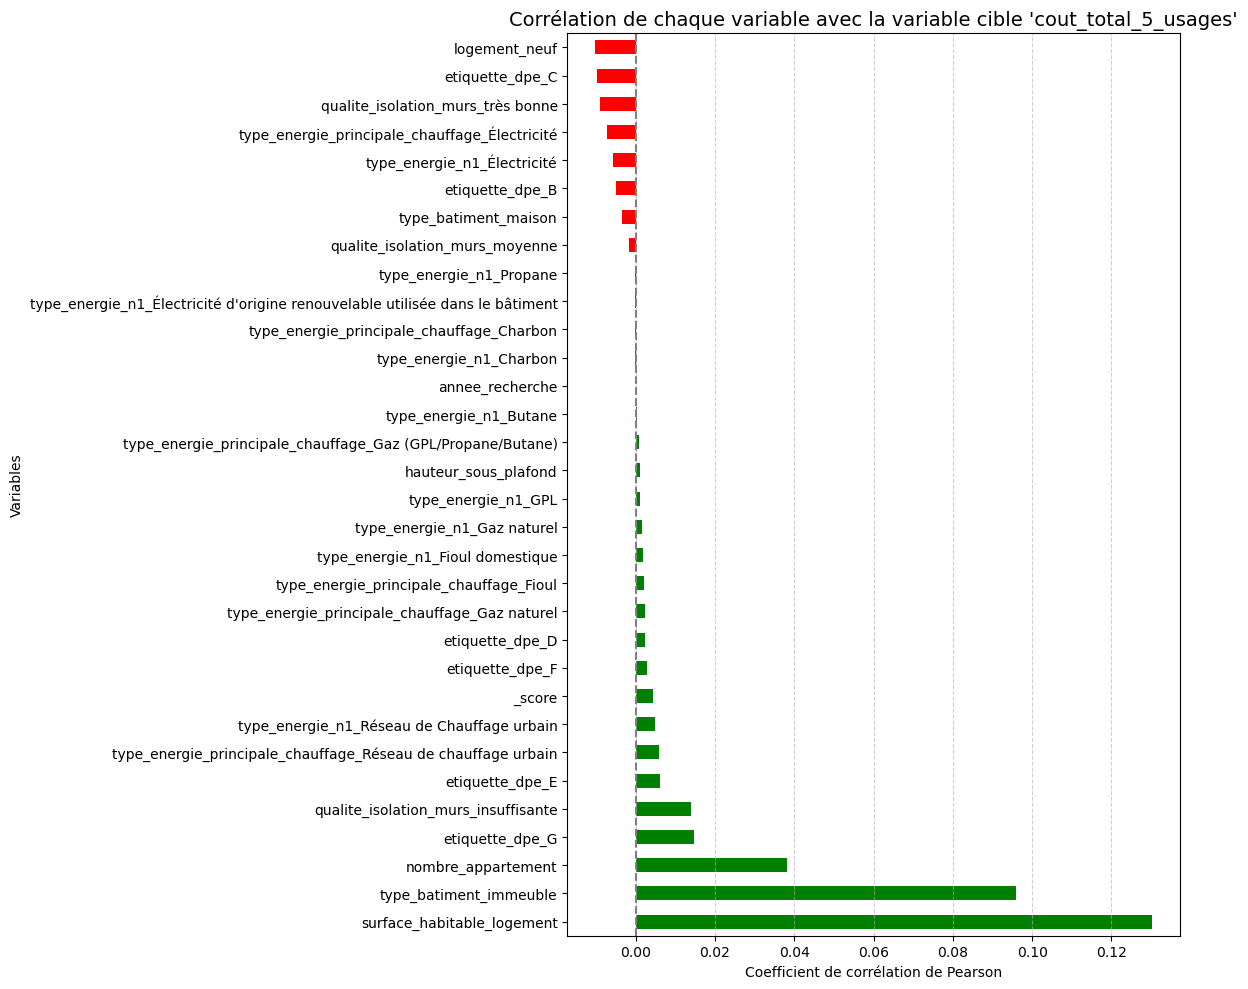

In [18]:
#Corrélations avec les différentes variables


colonnes_corr = [
       'cout_total_5_usages', 'hauteur_sous_plafond',
       'surface_habitable_logement',
       '_score', 'annee_recherche', 'nombre_appartement',
       'qualite_isolation_murs_insuffisante', 'qualite_isolation_murs_moyenne',
       'qualite_isolation_murs_très bonne', 'type_batiment_immeuble',
       'type_batiment_maison', 'type_energie_principale_chauffage_Charbon',
       'type_energie_principale_chauffage_Fioul',
       'type_energie_principale_chauffage_Gaz (GPL/Propane/Butane)',
       'type_energie_principale_chauffage_Gaz naturel',
       'type_energie_principale_chauffage_Réseau de chauffage urbain',
       'type_energie_principale_chauffage_Électricité',
       'type_energie_n1_Butane', 'type_energie_n1_Charbon',
       'type_energie_n1_Fioul domestique', 'type_energie_n1_GPL',
       'type_energie_n1_Gaz naturel', 'type_energie_n1_Propane',
       'type_energie_n1_Réseau de Chauffage urbain',
       'type_energie_n1_Électricité',
       'type_energie_n1_Électricité d\'origine renouvelable utilisée dans le bâtiment',
       'etiquette_dpe_B', 'etiquette_dpe_C', 'etiquette_dpe_D',
       'etiquette_dpe_E', 'etiquette_dpe_F', 'etiquette_dpe_G',
       'logement_neuf'
]

# Matrice de corrélation
mat_corr = df_encode[colonnes_corr].corr('pearson')

# Isolement de la colonne des corrélations  
corr_avec_score = mat_corr['cout_total_5_usages'].sort_values(ascending=False)

# Supprimer 'cout_total_5_usages' 
corr_avec_score = corr_avec_score.drop('cout_total_5_usages')

# Graphique à barres horizontal 
plt.figure(figsize=(12, 10)) 
corr_avec_score.plot(kind='barh', color=(corr_avec_score > 0).map({True: 'green', False: 'red'})) 
# La couleur est ajustée pour visualiser facilement les corrélations positives et négatives

plt.title("Corrélation de chaque variable avec la variable cible 'cout_total_5_usages'", fontsize=14)
plt.xlabel("Coefficient de corrélation de Pearson")
plt.ylabel("Variables")
plt.axvline(x=0, color='grey', linestyle='--') # Ligne de référence à 0
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout() # Assure que les étiquettes ne sont pas coupées
plt.show()

In [20]:
#choix cible et variables
cible = ['cout_total_5_usages']
variables_regression = [
        'hauteur_sous_plafond',
       'surface_habitable_logement',
       '_score', 'hauteur_sous_plafond',
       'qualite_isolation_murs_insuffisante', 'qualite_isolation_murs_moyenne',
       'qualite_isolation_murs_très bonne', 'type_batiment_immeuble',
       'type_batiment_maison',
       'type_energie_principale_chauffage_Fioul',
       'type_energie_principale_chauffage_Gaz (GPL/Propane/Butane)',
       'type_energie_principale_chauffage_Gaz naturel',
       'type_energie_principale_chauffage_Réseau de chauffage urbain',
       'type_energie_principale_chauffage_Électricité',
      
       'type_energie_n1_Fioul domestique', 'type_energie_n1_GPL',
       'type_energie_n1_Gaz naturel',
       'type_energie_n1_Réseau de Chauffage urbain',
       'type_energie_n1_Électricité',
       'etiquette_dpe_B', 'etiquette_dpe_C', 'etiquette_dpe_D',
       'etiquette_dpe_E', 'etiquette_dpe_F', 'etiquette_dpe_G',
       'logement_neuf'
]


X = df_encode[variables_regression]
y = df_encode[cible].values

In [21]:
from sklearn.model_selection import train_test_split

#préparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (806324, 26)
The dimension of X_test is (345568, 26)


In [22]:
#choix modèle
lr = LinearRegression()
#entraînement
lr.fit(X_train,y_train)
#prediction
y_pred = lr.predict(X_test)
#print(y_test)
print(lr.coef_)


[[-2.49965369e+01  4.24680894e+03  1.33435895e+02 -2.49965369e+01
   7.27052794e+01  1.23870007e+01 -1.19829643e+02  9.26665648e+02
  -1.39665974e+00  4.40527061e+00  1.91714470e+01  7.09760833e+01
   8.88242425e+01  3.06098925e+01 -6.33809015e-01  1.39162078e+01
   9.31408136e+01  3.31158574e+01 -6.12525563e+00  4.60975375e+01
   2.39407211e+02  4.81876523e+02  5.45349583e+02  3.78107131e+02
   7.97193231e+02  5.53747649e+00]]


ESTIMATION DU MODELE

In [23]:
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.01781924955992964
The test score for lr model is 0.018254474807834042


In [24]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold

# Découper y en classes (bins) pour la stratification
y_bins = np.digitize(y, np.quantile(y, np.arange(0, 1, 0.01))) # 100 bins
skf_reg = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr, X, y_bins, cv=skf_reg)
R2_moyen = np.mean(scores)


print(f"Les scores pour chaque fold sot : {scores} ")
print(f"R² moyen avec RepeatedKFold : {R2_moyen:.4f} sur {len(scores)} scores.")

Les scores pour chaque fold sot : [0.50989898 0.51095696 0.51233639 0.51371399 0.50987478] 
R² moyen avec RepeatedKFold : 0.5114 sur 5 scores.


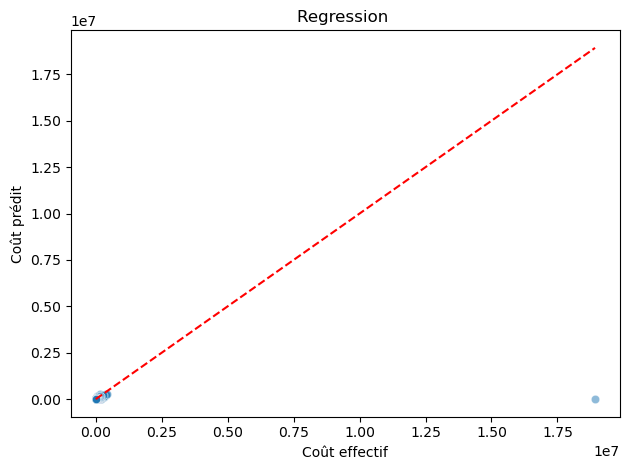

In [25]:
# Compute residuals.

residuals = y_test - y_pred

# Plot: Regression Fit (Actual vs Predicted).

sb.scatterplot(x=y_test[:,0], y=y_pred[:,0], alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression ")
plt.xlabel("Coût effectif")
plt.ylabel("Coût prédit")


# Show plots.
plt.tight_layout()
plt.show()